In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import _pickle as pickle
from PIL import Image
import os

import requests
import cv2

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../")

In [4]:
from bechdelai.vision.img import Img
from bechdelai.vision.faces import FacesDetector

# TODO


- Récupérer le code d'analyse des étudiants 
- RetinaFace ? 
- Récupérer les posters

# Ressources
- https://github.com/serengil/deepface
- https://github.com/serengil/retinaface

# Récupérer les posters

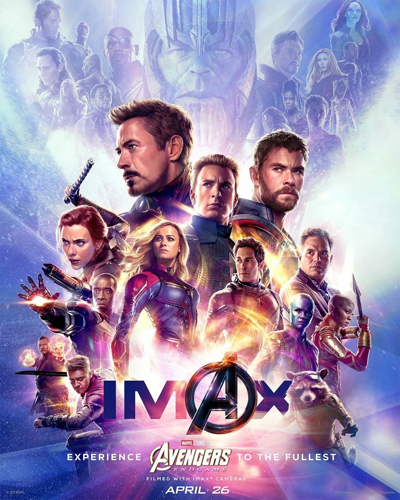

In [220]:
image = Img("./avengers-endgame-poster-imax.jpg")
image.resize(width = 400)
image

# Analyser un poster

In [221]:
detector = FacesDetector()

In [225]:
faces,faces_data,rois,representation = detector.analyze_gender_representation(image.array)

  0%|          | 0/20 [00:00<?, ?it/s]

In [382]:
representation.get('Manx',0)

0

In [227]:
faces_data

,dominant_emotion,age,gender,dominant_race,width,height,area,title,percentage
0,neutral,34,Man,white,62,45,2790,"Man, 34",0.013950
1,sad,44,Man,latino hispanic,75,51,3825,"Man, 44",0.019125
2,neutral,37,Man,white,53,40,2120,"Man, 37",0.010600
3,fear,26,Man,white,44,34,1496,"Man, 26",0.007480
4,happy,39,Man,white,34,23,782,"Man, 39",0.003910
5,neutral,39,Man,white,38,28,1064,"Man, 39",0.005320
6,fear,26,Woman,white,31,26,806,"Woman, 26",0.004030
7,fear,27,Man,white,18,14,252,"Man, 27",0.001260
8,surprise,35,Man,white,32,22,704,"Man, 35",0.003520
9,sad,29,Man,indian,24,20,480,"Man, 29",0.002400


## Afficher les visages

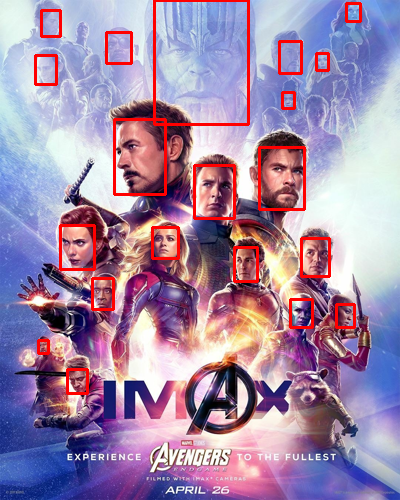

In [228]:
detector.show_faces_on_image(image.array,rois)

## Visualiser tous les visages

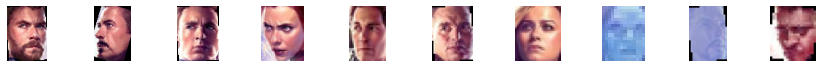

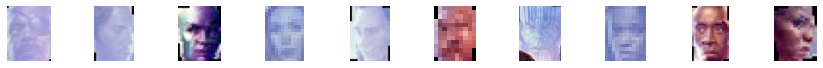

<Figure size 1080x72 with 0 Axes>

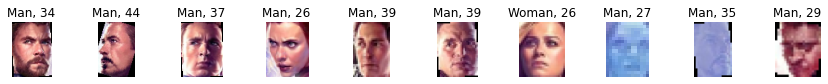

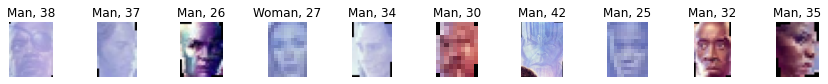

<Figure size 1080x72 with 0 Axes>

In [229]:
detector.show_all_faces(faces)
detector.show_all_faces(faces,titles = faces_data["title"].tolist())

# Analyser plusieurs posters

## Récupérer plusieurs posters d'un coup

In [5]:
from bechdelai.data.tmdb import search_movie_from_query
from bechdelai.data.tmdb import get_movie_details_from_id
from bechdelai.data.tmdb import get_movie_cast_from_id
from bechdelai.data.tmdb import format_results_for_suggestion
from bechdelai.data.tmdb import get_poster_image
from bechdelai.data.display import show_movie_suggestions_get_id
from bechdelai.data.tmdb import get_movie_details_from_imdb_id,discover_movies,discover_all_movies
from bechdelai.data.tmdb import download_all_posters

In [6]:
movie_id = "414906"
api_key = os.environ.get("TMDB_API_KEY")

In [289]:
movies = discover_all_movies(
    with_original_language="fr",
    year = 2021,
#     start_year = "2021-01-01",
#     end_year = "2022-05-29",
    min_vote_count=10,
    pages = 7
)

  0%|          | 0/7 [00:00<?, ?it/s]

124 Results in total and 7 pages
{'with_original_language': 'fr', 'vote_count.gte': 10, 'page': 1, 'sort_by': 'popularity.desc', 'primary_release_year': 2021}


In [290]:
movies.shape

(124, 14)

In [300]:
download_all_posters(movies,"test")

  0%|          | 0/124 [00:00<?, ?it/s]

Skipped movie 123


In [301]:
movies

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/tq3klWQevRK0Or0cGhsw0h3FDWQ.jpg,"[12, 16, 35, 10751, 14]",676705,fr,Pil,"Pil, a little vagabond girl, lives on the stre...",471.573,/abPQVYyNfVuGoFUfGVhlNecu0QG.jpg,2021-08-11,Pil's Adventures,False,6.8,86
1,False,/rlNnwObbMu5G2FaOUlacnUIdIIA.jpg,"[16, 35, 10751, 12]",726684,fr,"Miraculous World: Shanghai, la légende de Lady...","On school break, Marinette heads to Shanghai t...",228.116,/qQ0VKsGRQ2ofAmswGNzZnvC1xPE.jpg,2021-05-15,Miraculous World: Shanghai – The Legend of Lad...,False,7.9,441
2,False,/qOnLuCJDFhRzbWzhpA4aoK75vfY.jpg,"[27, 878, 18, 53]",523936,fr,Méandre,"After getting a car ride from an unknown man, ...",181.902,/2OTIAx8AmwGCaXmq5ohQCyPUjdC.jpg,2021-05-26,Meander,False,6.1,248
3,False,/lPJHnDI5mIRDiLCFn26u4XdLXi8.jpg,"[35, 18]",783558,fr,Envole-moi,"Thomas, a blasé young man, spends his nights i...",108.244,/Aviebr72gvK9I73m68Go3K4hq1r.jpg,2021-05-19,Fly Me Away,False,6.9,44
4,False,/fZ4hrFacm5yow9gT64rS6YMNyHz.jpg,"[28, 35]",729720,fr,Le Dernier Mercenaire,A legendary secret service agent comes out of ...,103.394,/ttpKJ7XQxDZV252KNEHXtykYT41.jpg,2021-07-30,The Last Mercenary,False,6.7,485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,False,/edcclPdeX8prUMI7mHujKjB2Cy0.jpg,"[99, 10752]",682454,fr,Il n'y aura plus de nuit,Images from helicopters. Video recordings from...,1.217,/rXf80kTWiWth46lsh6uCSfteW6w.jpg,2021-06-16,There Will Be No More Night,False,6.7,12
120,False,/qkOtHudCoUnpREY5bWjs9fQtkkF.jpg,[18],712158,fr,Ibrahim,When teenage Ibrahim lands his father with an ...,1.156,/gGRvFA02Kb1WcwIBBEQWcrTOtrv.jpg,2021-06-23,Ibrahim,False,5.7,13
121,False,/n4Vx5OLsQvhajv890oWcoLXBDJh.jpg,[35],718529,fr,100% bio,Culture shock between a pork butcher from the ...,1.129,/znPcGdsDxUJWLj6wf4M6pJIr4Z8.jpg,2021-01-05,100% bio,False,5.6,15
122,False,/zg19FvVd1htMkzEZQFTFT9oERmM.jpg,"[18, 10770]",845182,fr,À tes côtés,The story of a father and son who live in pola...,1.037,/gU82VHNFWEoBmo6s2oZLT0Ijbii.jpg,2021-06-25,À tes côtés,False,6.1,11


In [237]:
# get_movie_details_from_imdb_id("tt1877830")
# get_movie_details_from_id(movie_id)

In [238]:
img = Img(get_poster_image(movie_id,as_img = True,backdrop = True))
img.resize(width = 400)

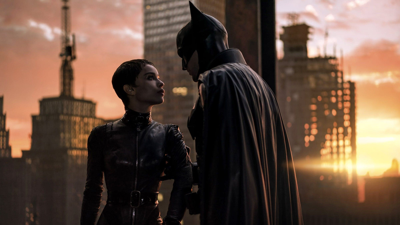

In [239]:
img

## Analyse massive des posters

In [422]:
folder = "test"
posters = [os.path.join(folder,x) for x in os.listdir(folder) if x.endswith(".png")]

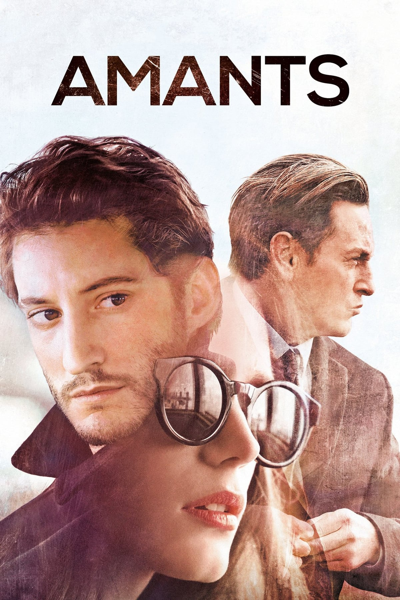

In [425]:
img = Img(posters[8])
img = img.resize(width = 400)
img

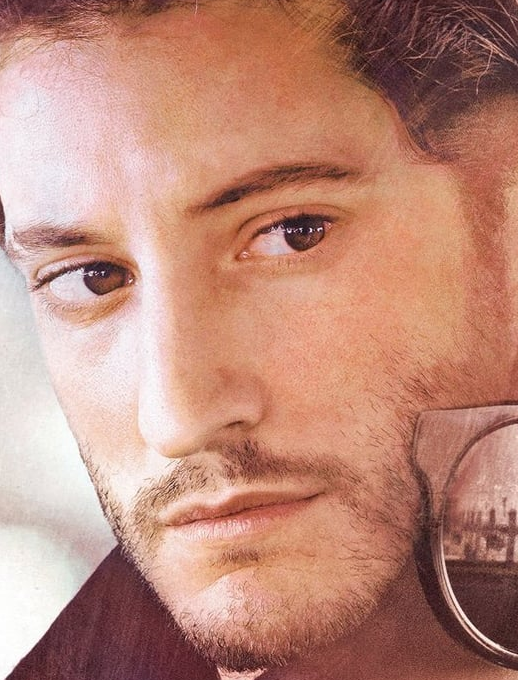

In [426]:
faces[1]

  0%|          | 0/3 [00:00<?, ?it/s]

gender
Man    0.511896
Name: percentage, dtype: float64


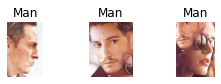

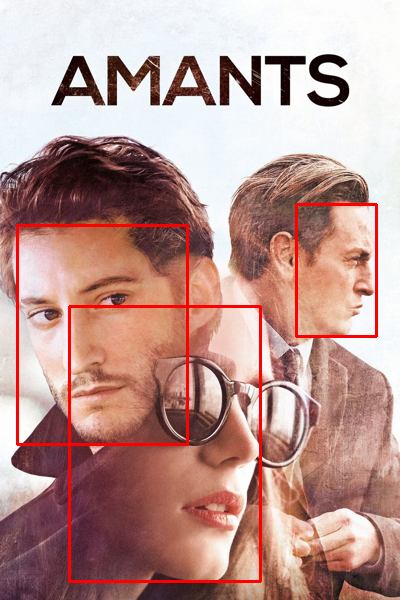

In [427]:
faces,faces_data,rois,representation = detector.analyze_gender_representation(img.array,padding = 10)
print(representation)
detector.show_all_faces(faces,titles = faces_data["title"].tolist())
Img(detector.show_faces_on_image(img.array,rois)).resize(width = 400)

# Harry Potter

In [18]:
from bechdelai.data.tmdb import get_poster_image_from_url

In [15]:
results = search_movie_from_query("harry potter")["results"]
results = pd.DataFrame(results)[:8]

In [19]:
imgs = [get_poster_image_from_url(x) for x in results["poster_path"].tolist()]

In [22]:
for i,img in enumerate(imgs):
    img.save(f"hp/{i}.png")

In [11]:
results["results"]

[{'adult': False,
  'backdrop_path': '/5jkE2SzR5uR2egEb1rRhF22JyWN.jpg',
  'genre_ids': [12, 14],
  'id': 671,
  'original_language': 'en',
  'original_title': "Harry Potter and the Philosopher's Stone",
  'overview': "Harry Potter has lived under the stairs at his aunt and uncle's house his whole life. But on his 11th birthday, he learns he's a powerful wizard—with a place waiting for him at the Hogwarts School of Witchcraft and Wizardry. As he learns to harness his newfound powers with the help of the school's kindly headmaster, Harry uncovers the truth about his parents' deaths—and about the villain who's to blame.",
  'popularity': 233.495,
  'poster_path': '/wuMc08IPKEatf9rnMNXvIDxqP4W.jpg',
  'release_date': '2001-11-16',
  'title': "Harry Potter and the Philosopher's Stone",
  'video': False,
  'vote_average': 7.9,
  'vote_count': 22692},
 {'adult': False,
  'backdrop_path': '/urDWNffjwmNi5IQaezw9GwqkUXa.jpg',
  'genre_ids': [12, 14],
  'id': 767,
  'original_language': 'en',
  